Import Libraries

In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Scraping Latest startup Funding data 

In [49]:
page=requests.get('https://trak.in/india-startup-funding-investment-2015/')
soup=BeautifulSoup(page.content,'html.parser')
target=soup.find('tbody', class_='row-hover')
#df=pd.DataFrame(columns=['Date','Startup Name','Industry/Vertical','Sub-vertical','City/Location','Investors name','Investment Type','Amount(in usd)'])
#print(df)
data=[]
for tr in soup.find_all('tbody'):
    for td in tr.find_all('tr'):
        tds=td.find_all('td')
        data.append({'Date':tds[1].text, 'StartupName':tds[2].text,'IndustryVertical':tds[3].text,'Subvertical':tds[4].text, 'CityLocation':tds[5].text,"InvestorsName":tds[6].text,'InvestmentType':tds[7].text,'Amount (in USD)':tds[8].text})
          
df=pd.DataFrame(data)
df.head()
#df.describe()


,Amount (in USD),CityLocation,Date,IndustryVertical,InvestmentType,InvestorsName,StartupName,Subvertical
0,"460,000,000",Bengaluru,01/04/2021,Edu-tech,Series F,Innoven Capital,BYJU’S,Online tutoring
1,"300,000,000",Bengaluru,05/04/2021,E-commerce,Series E,SoftBank Vision Fund 2,Meesho,Online reselling platform
2,"343,000,000",Bengaluru,14/04/2021,Online Food Delivery,Series J,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Swiggy,Online Food Delivery
3,"83,000,000",Bengaluru,07/04/2021,FinTech,Series D,"MC Global Edtech, B Capital, Baron, others",Groww,Investment platform
4,"7,400,000",Mumbai,14/04/2021,E-commerce,Venture,Hindustan Media Ventures,Beldara,Global B2B marketplace


Loading Old dataset of startup funding

In [50]:
df2=pd.read_csv('startup_funding.csv')
df2.drop(['Remarks','SNo'],axis='columns', inplace=True)
df2.rename(columns={'SubVertical':'Subvertical','AmountInUSD':'Amount (in USD)'},inplace='True')
df2.head()
#df2.describe()

,Date,StartupName,IndustryVertical,Subvertical,CityLocation,InvestorsName,InvestmentType,Amount (in USD)
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


Combining these 2 datasets to create a final dataset

In [51]:
final_df=pd.concat([df,df2],axis=0,sort="True")
final_df.head()
#final_df.describe()

,Amount (in USD),CityLocation,Date,IndustryVertical,InvestmentType,InvestorsName,StartupName,Subvertical
0,"460,000,000",Bengaluru,01/04/2021,Edu-tech,Series F,Innoven Capital,BYJU’S,Online tutoring
1,"300,000,000",Bengaluru,05/04/2021,E-commerce,Series E,SoftBank Vision Fund 2,Meesho,Online reselling platform
2,"343,000,000",Bengaluru,14/04/2021,Online Food Delivery,Series J,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Swiggy,Online Food Delivery
3,"83,000,000",Bengaluru,07/04/2021,FinTech,Series D,"MC Global Edtech, B Capital, Baron, others",Groww,Investment platform
4,"7,400,000",Mumbai,14/04/2021,E-commerce,Venture,Hindustan Media Ventures,Beldara,Global B2B marketplace


Data Cleaning

In [52]:
final_df.describe()
final_df.isnull().sum()

Amount (in USD)     847
CityLocation        179
Date                  0
IndustryVertical    171
InvestmentType        1
InvestorsName         8
StartupName           0
Subvertical         936
dtype: int64

In [53]:
final_df.dropna(inplace=True)
final_df.isnull().sum()

Amount (in USD)     0
CityLocation        0
Date                0
IndustryVertical    0
InvestmentType      0
InvestorsName       0
StartupName         0
Subvertical         0
dtype: int64

In [54]:
final_df.describe()

,Amount (in USD),CityLocation,Date,IndustryVertical,InvestmentType,InvestorsName,StartupName,Subvertical
count,1436,1436,1436,1436,1436,1436,1436,1436
unique,367,70,576,120,57,983,1045,1110
top,"1,000,000",Bangalore,10/07/2018,Consumer Internet,Private Equity,N/A,Nykaa,AI Based Solutions Platform
freq,101,299,16,607,654,28,7,8


In [55]:
final_df.shape

(1436, 8)

Removing the noise from the dataset

In [56]:
final_df=final_df.loc[final_df['Amount (in USD)'] != 'Undisclosed']
final_df=final_df.loc[final_df['Amount (in USD)'] !='75,000,000-100,000,000']
final_df=final_df.loc[final_df['Amount (in USD)'] !='NA']
final_df=final_df.loc[final_df['Amount (in USD)'] !='upto 8,900,000']
final_df=final_df.loc[final_df['Amount (in USD)'] !='upto 15,000,000']
final_df=final_df.loc[final_df['Amount (in USD)'] !='NA\n']
final_df=final_df.loc[final_df['Amount (in USD)'] != 'undisclosed']
final_df=final_df.loc[final_df['Amount (in USD)'] != 'unknown']
final_df=final_df.loc[final_df['Amount (in USD)'] != '']
final_df=final_df.loc[final_df['Amount (in USD)'] !='N/A']
final_df['Amount (in USD)']=final_df['Amount (in USD)'].apply(lambda x: float(str(x).replace(",","")))


In [57]:
final_df.shape

(1369, 8)

Exploring the Funding Amount

In [58]:
print('Minimum Funding: ' + str(final_df['Amount (in USD)'].min())+ ' USD')
print('Maximum Funding: ' + str(final_df['Amount (in USD)'].max())+ ' USD')
print('Median Funding: ' + str(final_df['Amount (in USD)'].median())+ ' USD')
print('Mean Funding: ' + str(round(final_df['Amount (in USD)'].mean(),2))+ ' USD')
print('Std. Deviation: ' + str(round(final_df['Amount (in USD)'].std(),2))+ ' USD')


Minimum Funding: 18000.0 USD
Maximum Funding: 3900000000.0 USD
Median Funding: 2500000.0 USD
Mean Funding: 24479356.61 USD
Std. Deviation: 136962468.53 USD


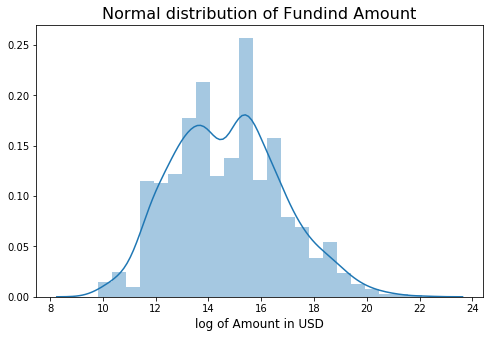

In [59]:
final_df['Amount (in USD)_log'] = np.log(final_df["Amount (in USD)"] + 1)

plt.figure(figsize=(8,5))
sns.distplot(final_df['Amount (in USD)_log'].dropna())
plt.xlabel('log of Amount in USD', fontsize=12)
plt.title("Normal distribution of Fundind Amount", fontsize=16)
plt.show()


We can see that from the graph that Mean and Median are almost equal as it is symmetrical not skewed

Exploring the Investment Types

In [60]:
Investdesc=final_df.InvestmentType.value_counts()
print(Investdesc)

Private Equity              641
Seed Funding                396
Seed/ Angel Funding          96
Series A                     33
Series B                     24
Series C                     24
Seed                         21
Debt Funding                 14
Series D                     13
Pre-Series A                  9
Series E                      8
Series F                      8
Seed / Angel Funding          8
                              7
Seed Round                    6
Venture                       4
Debt Financing                4
Private Funding               4
Private Equity Round          4
pre-Series A                  4
Venture - Series Unknown      2
Venture Round                 2
In Progress                   2
Series J                      2
Angel                         2
Venture-Series Unknown        2
Venture Series                2
Funding                       1
Follow-On                     1
Series C1                     1
Series G                      1
Pre Seed

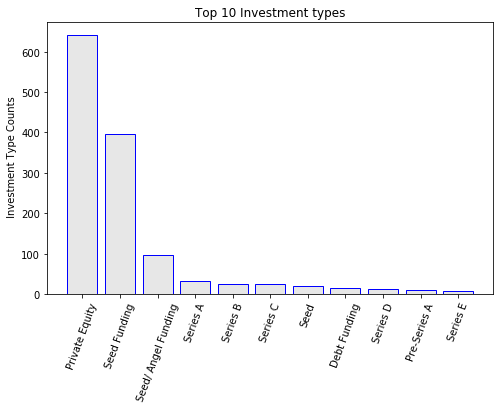

In [61]:
#plotting top 10 investment types
plt.figure(figsize=(8,5))
plt.bar(list(Investdesc[0:11].index),list(Investdesc[0:11].values),color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.xticks(rotation=70)
plt.ylabel(' Investment Type Counts')
plt.title('Top 10 Investment types')

plt.show()


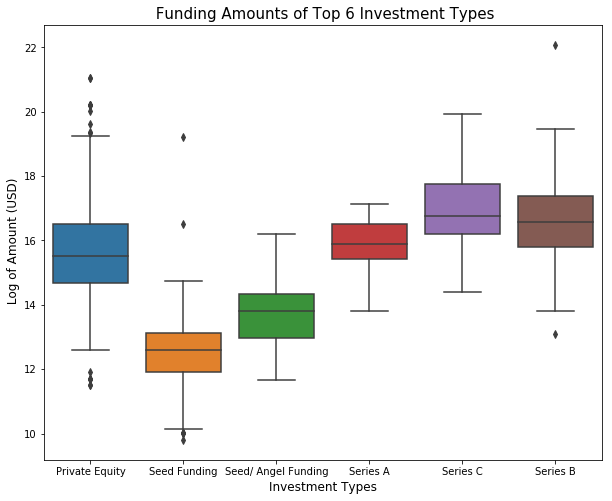

In [62]:
plt.figure(figsize=(10,8))
final_df1=final_df.loc[final_df['InvestmentType'] == 'Private Equity']
final_df2=final_df.loc[final_df['InvestmentType'] == 'Seed Funding']
final_df3=final_df.loc[final_df['InvestmentType'] == 'Seed/ Angel Funding']
final_df4=final_df.loc[final_df['InvestmentType'] == 'Series A']
final_df5=final_df.loc[final_df['InvestmentType'] == 'Series C']
final_df6=final_df.loc[final_df['InvestmentType'] == 'Series B']
dummy_df=pd.concat([final_df1,final_df2,final_df3,final_df4,final_df5,final_df6],axis=0,sort=True)
g1 = sns.boxplot(x='InvestmentType', y="Amount (in USD)_log", 
            data=dummy_df)
#plt.xticks(rotation=45)
g1.set_title(" Funding Amounts of Top 6 Investment Types", fontsize=15)
g1.set_xlabel("Investment Types", fontsize=12)
g1.set_ylabel(" Log of Amount (USD)", fontsize=12)
plt.show()


Exploring the main Investors

In [63]:
Investors = final_df.InvestorsName.value_counts()
print("Description count of Investors")
print(Investors[:15])

Description count of Investors
N/A                      24
Undisclosed Investors    17
Undisclosed investors    16
undisclosed investors    11
Info Edge (India) Ltd    11
Kalaari Capital           9
InnoVen Capital           8
Brand Capital             7
Indian Angel Network      7
Undisclosed investor      7
Sequoia Capital India     7
Trifecta Capital          6
Accel Partners            6
Undisclosed               5
Undisclosed Investor      5
Name: InvestorsName, dtype: int64


In [64]:
final_df['InvestorsName']=final_df['InvestorsName'].replace(['N/A','Undisclosed investors','Undisclosed Investor','undisclosed investors','Undisclosed investor','Undisclosed'],'Undisclosed Investors')
Investors = final_df.InvestorsName.value_counts()
print("Description count of Investors")
print(Investors[:15])

Description count of Investors
Undisclosed Investors     85
Info Edge (India) Ltd     11
Kalaari Capital            9
InnoVen Capital            8
Sequoia Capital India      7
Brand Capital              7
Indian Angel Network       7
Accel Partners             6
Trifecta Capital           6
Flipkart                   5
Y Combinator               5
Sequoia India              5
Fosun International        5
Alteria Capital            5
Credence Family Office     4
Name: InvestorsName, dtype: int64


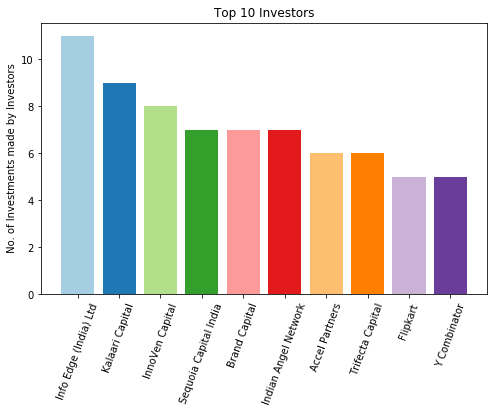

In [65]:
#Ignoring the undisclosed data
plt.figure(figsize=(8,5))
plt.bar(list(Investors[1:11].index),list(Investors[1:11].values),color=plt.cm.Paired(np.arange(len(final_df))))
plt.xticks(rotation=70)
plt.ylabel(' No. of Investments made by Investors')
plt.title('Top 10 Investors')
plt.show()

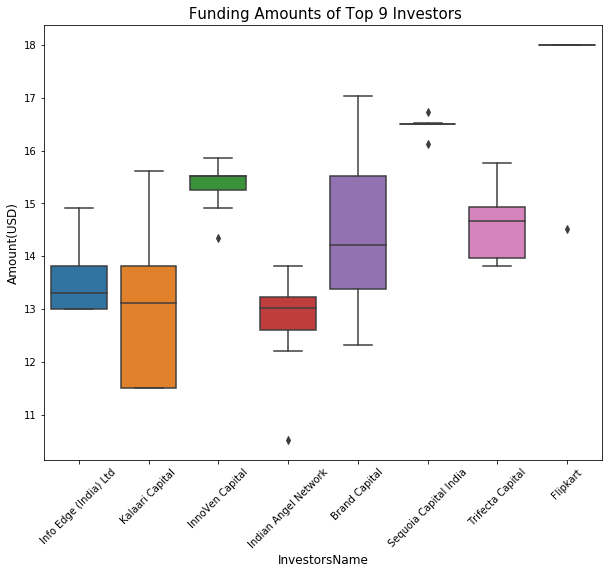

In [66]:
plt.figure(figsize=(10,8))
d1=final_df.loc[final_df['InvestorsName'] == 'Info Edge (India) Ltd']
d2=final_df.loc[final_df['InvestorsName'] == 'Kalaari Capital']
d3=final_df.loc[final_df['InvestorsName'] == 'InnoVen Capital']
d4=final_df.loc[final_df['InvestorsName'] == 'Indian Angel Network']
d5=final_df.loc[final_df['InvestorsName'] == 'Brand Capital']
d6=final_df.loc[final_df['InvestorsName'] == 'Sequoia Capital India']
d7=final_df.loc[final_df['InvestorsName'] == 'Trifecta Capital']
d8=final_df.loc[final_df['InvestorsName'] == 'SAccel Partners']
d9=final_df.loc[final_df['InvestorsName'] == 'Flipkart']
di=pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9],axis=0,sort=True)
g2 = sns.boxplot(x='InvestorsName', y="Amount (in USD)_log", 
            data=di)
plt.xticks(rotation=45)
g2.set_title(" Funding Amounts of Top 9 Investors", fontsize=15)
g2.set_xlabel("InvestorsName", fontsize=12)
g2.set_ylabel("Amount(USD)", fontsize=12)
plt.show()


Exploring the Startup Cities

In [67]:
#city=final_df['City/Location'].value_counts()
#print(city)
final_df['CityLocation']=final_df['CityLocation'].replace(['Bengaluru','Bangalore / SFO','Bangalore/ Bangkok','SFO / Bangalore','San Francisco/ Bangalore','Singapore and Bangalore'],'Bangalore')
final_df['CityLocation']=final_df['CityLocation'].replace(['Delhi','New York and Delhi','New Delhi / US'],'New Delhi')
final_df['CityLocation']=final_df['CityLocation'].replace(['Gurgaon','Gurugram','Noida','Haryana','Faridababd'],'Delhi NCR')
city=final_df.CityLocation.value_counts()
print(city[:10])

Bangalore    463
Mumbai       269
Delhi NCR    228
New Delhi    160
Hyderabad     54
Pune          52
Chennai       46
Ahmedabad     18
Jaipur         9
Singapore      5
Name: CityLocation, dtype: int64


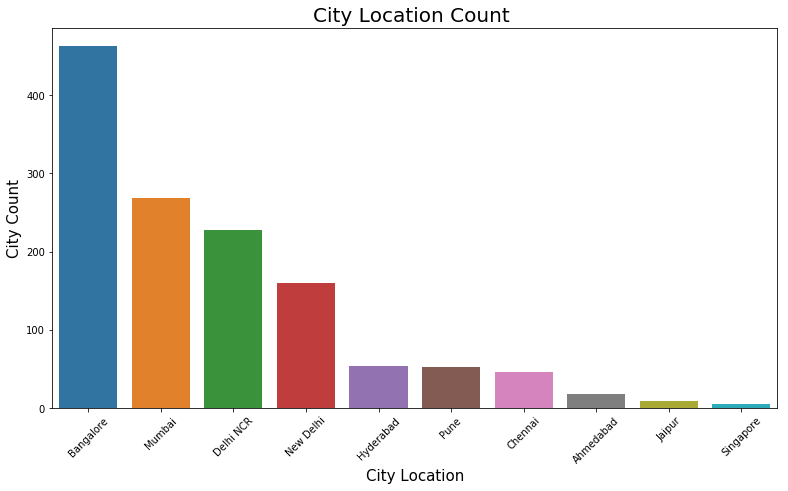

In [68]:
#Analyzing Top 10 Cities
plt.figure(figsize=(13,7))

sns.barplot(x=city.index[:10], y=city.values[:10])
plt.xticks(rotation=45)
plt.xlabel('City Location', fontsize=15)
plt.ylabel('City Count', fontsize=15)
plt.title("City Location Count ", fontsize=20)


plt.show()

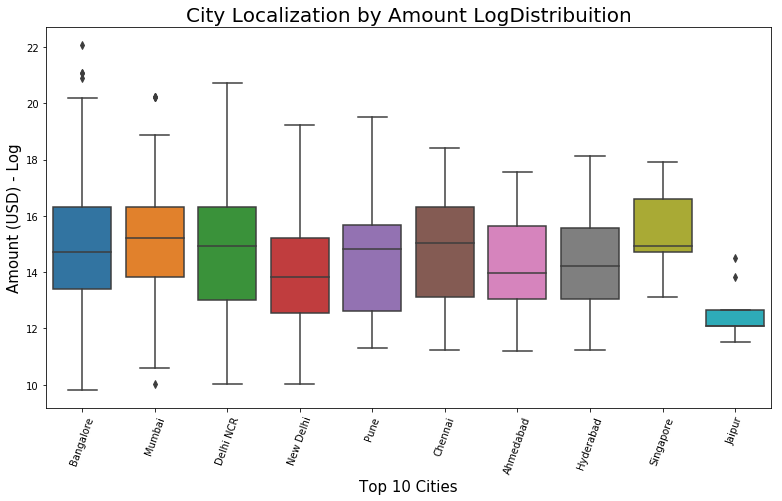

In [69]:
plt.figure(figsize=(13,7))
g = sns.boxplot(x='CityLocation', y="Amount (in USD)_log",
                data=final_df[final_df.CityLocation.isin(city[:10].index.values)])
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_title("City Localization by Amount LogDistribuition", fontsize=20)
g.set_xlabel("Top 10 Cities", fontsize=15)
g.set_ylabel("Amount (USD) - Log", fontsize=15)
plt.show()

Exploring Different sectors

In [70]:
final_df['IndustryVertical']=final_df['IndustryVertical'].replace(['ECommerce','E-commerce','E-Commerce','ecommerce','Ecommerce'],'eCommerce')
final_df['IndustryVertical']=final_df['IndustryVertical'].replace(['FinTech','Fintech'],'Fin-Tech')
final_df['IndustryVertical']=final_df['IndustryVertical'].replace(['EduTech','EdTech','Edu-tech',''],'Ed-Tech')
sector=final_df.IndustryVertical.value_counts()
print(sector[:10])


Consumer Internet    603
Technology           219
eCommerce            181
Fin-Tech              47
Healthcare            39
Finance               36
Ed-Tech               27
Logistics             21
Education             18
IT                    16
Name: IndustryVertical, dtype: int64


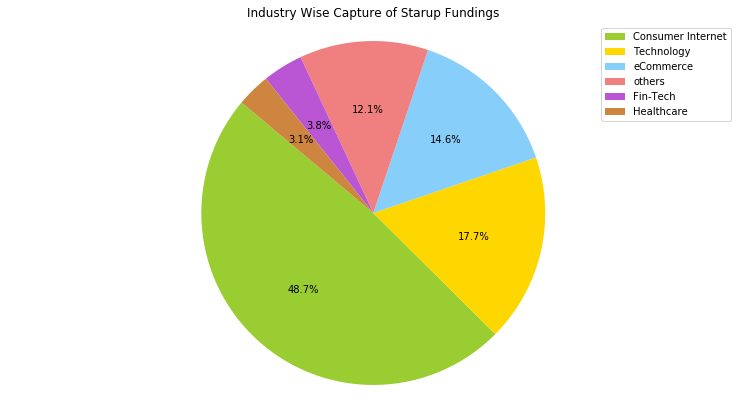

In [71]:
b1=final_df[final_df.IndustryVertical.isin(sector[:5].index.values)]
b2=final_df[final_df.IndustryVertical.isin(sector[11:].index.values)]
b2.IndustryVertical='others'
industry_df=pd.concat([b1,b2],axis=0,sort=True)
sector1=industry_df.IndustryVertical.value_counts()
#print(sector1.values)

plt.figure(figsize=(13,7))
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','mediumorchid','peru']
plt.pie(sector1.values,autopct='%1.1f%%',colors=colors, startangle=140)
plt.legend(list(sector1.index), loc="best")
plt.title('Industry Wise Capture of Starup Fundings')
plt.axis('equal')
plt.show()

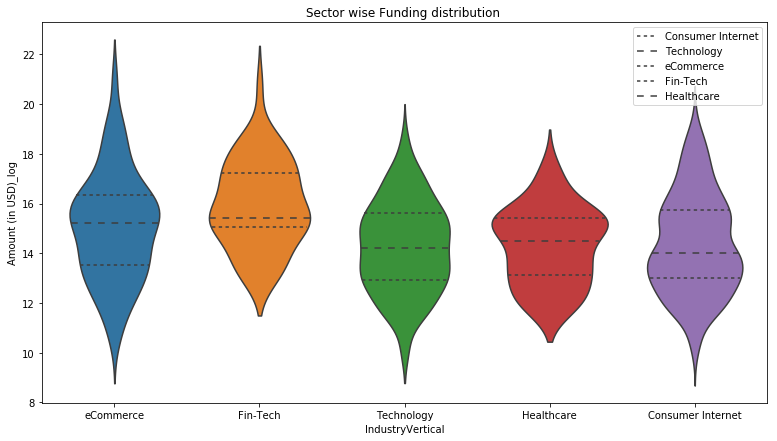

In [72]:
plt.figure(figsize=(13,7))
sns.violinplot(x='IndustryVertical',y='Amount (in USD)_log',inner='quartile', data=b1)
plt.legend(labels=list(sector[:5].index),loc='best')
plt.title('Sector wise Funding distribution ')
plt.show()

Exploring the Date-time data

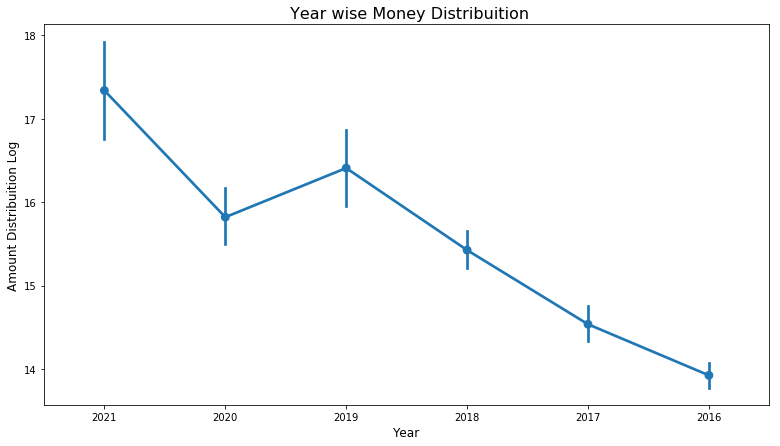

In [73]:
final_df['Date'] = pd.to_datetime(final_df['Date'],errors='coerce')

final_df['Date_month_year'] = final_df['Date'].dt.to_period("M")
final_df['Date_year'] = final_df['Date'].dt.to_period("A")

plt.figure(figsize=(13,7))
sns.pointplot(x='Date_year', y='Amount (in USD)_log', data=final_df)
#plt.xticks(rotation=70)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount Distribuition Log', fontsize=12)
plt.title(" Year wise Money Distribuition", fontsize=16)
plt.show()

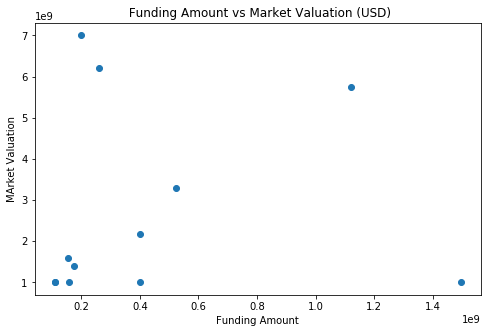

In [102]:
#Exploring the relationship between the progress and the amount of funding for startups

page1=requests.get('https://www.orfonline.org/research/the-indian-startup-ecosystem-drivers-challenges-and-pillars-of-support-55387/')
soup1=BeautifulSoup(page1.content,'html.parser')
tarr = soup1.find('tbody')
#print(tarr.text)

#we can see the total valuation of Indian startup which we will use to plot 
d1_df=final_df.loc[final_df['StartupName']=='Snapdeal']
d1=d1_df['Amount (in USD)'].sum()
d2_df=final_df.loc[final_df['StartupName']=='Ola Cabs']
d2=d2_df['Amount (in USD)'].sum()
d3_df=final_df.loc[final_df['StartupName']=='One97 Communciations']
d3=d3_df['Amount (in USD)'].sum()
d4_df=final_df.loc[final_df['StartupName']=='Hike']
d4=d4_df['Amount (in USD)'].sum()
d5_df=final_df.loc[final_df['StartupName']=='Udaan']
d5=d5_df['Amount (in USD)'].sum()
d6_df=final_df.loc[final_df['StartupName']=='BillDesk']
d6=d6_df['Amount (in USD)'].sum()
d7_df=final_df.loc[final_df['StartupName']=='Delhivery']
d7=d7_df['Amount (in USD)'].sum()
d8_df=final_df.loc[final_df['StartupName']=='PolicyBazaar']
d8=d8_df['Amount (in USD)'].sum()
d9_df=final_df.loc[final_df['StartupName']=='Zomato']
d9=d9_df['Amount (in USD)'].sum()
d10_df=final_df.loc[final_df['StartupName']=='Swiggy']
d10=d10_df['Amount (in USD)'].sum()
d11_df=final_df.loc[final_df['StartupName']=='OYO Rooms']
d11=d11_df['Amount (in USD)'].sum()
d12_df=final_df.loc[final_df['StartupName']=='ReNew Power']
d12=d12_df['Amount (in USD)'].sum()
d13_df=final_df.loc[final_df['StartupName']=='BYJU’S']
d13=d13_df['Amount (in USD)'].sum()
d14_df=final_df.loc[final_df['StartupName']=='Rivigo']
d14=d14_df['Amount (in USD)'].sum()
d15_df=final_df.loc[final_df['StartupName']=='Ola Electric Mobility']
d15=d15_df['Amount (in USD)'].sum()
d16_df=final_df.loc[final_df['StartupName']=='Dream11']
d16=d16_df['Amount (in USD)'].sum()
d17_df=final_df.loc[final_df['StartupName']=='BigBasket']
d17=d17_df['Amount (in USD)'].sum()
q=list([d1,d2,d4,d5,d7,d8,d9,d10,d13,d14,d16,d17])
#print(q)
p=[7,6.2,1.4,1,1.6,1,2.18,3.3,5.75,1,1,1] 
p=[i *1000000000 for i in p]
#print(p)
plt.figure(figsize=(8,5))
plt.scatter(q,p)
plt.title(' Funding Amount vs Market Valuation (USD)')
plt.xlabel('Funding Amount')
plt.ylabel('MArket Valuation')
plt.show()



In [149]:
# Exploring the startups in New Delhi
final_df['CityLocation']=final_df['CityLocation'].replace(['New Delhi','Delhi NCR'],'Delhi')
t=final_df.loc[final_df['CityLocation']=='Delhi']
t.sort_values(by='Date',inplace=True)
t.reset_index(inplace=True)
t.drop('index',axis='columns',inplace=True)
print(t.shape)
    


(388, 11)


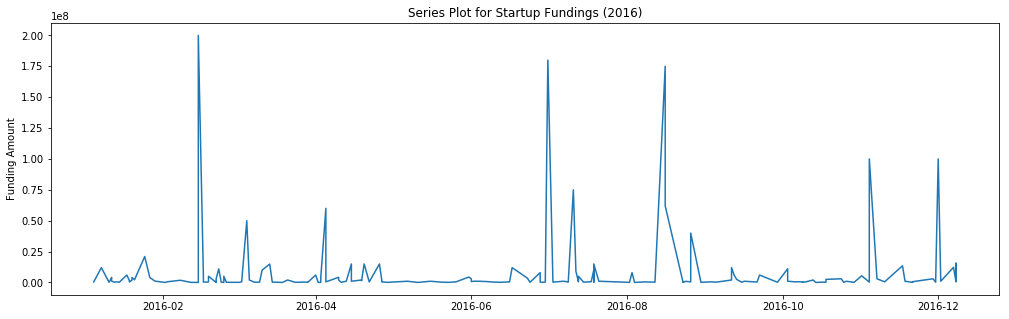

In [164]:
#for 2016
plt.figure(figsize=(17,5))
plt.plot(t.iloc[:180]['Date'],t.iloc[:180]['Amount (in USD)'])
plt.ylabel('Funding Amount')
plt.title('Series Plot for Startup Fundings (2016)')
plt.show()

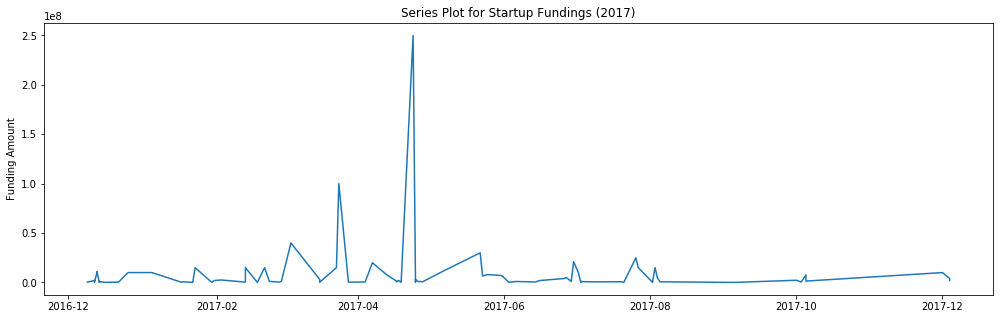

In [165]:
#for 2017
plt.figure(figsize=(17,5))
plt.plot(t.iloc[180:260]['Date'],t.iloc[180:260]['Amount (in USD)'])
plt.ylabel('Funding Amount')
plt.title('Series Plot for Startup Fundings (2017)')
plt.show()

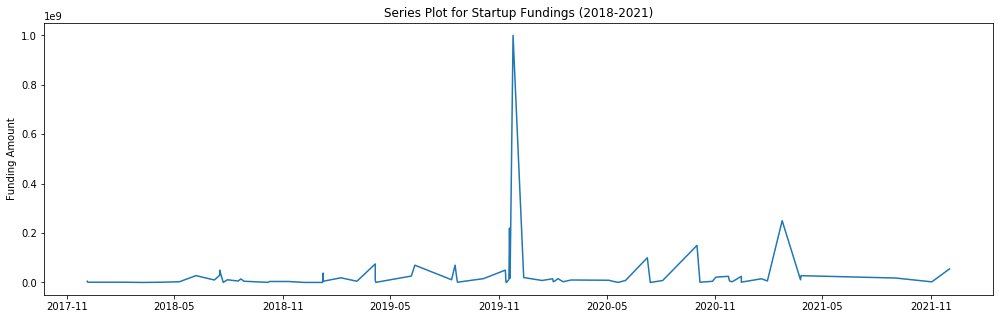

In [169]:
#for 2018-2021
plt.figure(figsize=(17,5))
plt.plot(t.iloc[260:]['Date'],t.iloc[260:]['Amount (in USD)'])
plt.ylabel('Funding Amount')
plt.title('Series Plot for Startup Fundings (2018-2021)')
plt.show()

In [171]:
#Fundings in Delhi
print('Minimum Funding: ' + str(t['Amount (in USD)'].min())+ ' USD')
print('Maximum Funding: ' + str(t['Amount (in USD)'].max())+ ' USD')
print('Median Funding: ' + str(t['Amount (in USD)'].median())+ ' USD')
print('Mean Funding: ' + str(round(t['Amount (in USD)'].mean(),2))+ ' USD')
print('Std. Deviation: ' + str(round(t['Amount (in USD)'].std(),2))+ ' USD')


Minimum Funding: 22500.0 USD
Maximum Funding: 1000000000.0 USD
Median Funding: 1900000.0 USD
Mean Funding: 13930149.83 USD
Std. Deviation: 58825367.07 USD


In [185]:
#startup details with the maximum funding of 1000000000.0 USD
k=t.loc[t['Amount (in USD)']==t['Amount (in USD)'].max()]
k

,Amount (in USD),CityLocation,Date,IndustryVertical,InvestmentType,InvestorsName,StartupName,Subvertical,Amount (in USD)_log,Date_month_year,Date_year
352,1.000000e+09,Delhi,2019-11-25,Fin-Tech,Funding Round,Vijay Shekhar Sharma,Paytm,Mobile Wallet,20.723266,2019-11,2019


# Predictive Model for startup success


In [3]:
train  = pd.read_csv("training_set_label.csv")
test = pd.read_csv("testing_set_label.csv")

In [4]:
train.shape, test.shape

((923, 48), (231, 47))

In [5]:
train.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [6]:
test.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,127,CT,41.321520,-72.929423,6511,c:14666,New Haven,NaN,REMOTV,02-10-07,...,0,c:14666,0,1,1,1,0,0,1.3333,1
1,556,CA,37.452084,-122.112879,94303,c:31546,Palo Alto,NaN,Satiety,01-01-00,...,1,c:31546,0,0,0,0,0,1,6.0000,1
2,812,NJ,40.296222,-74.050972,7724,c:46259,Eatontown,Eatontown NJ 7724,CebaTech,01-01-04,...,0,c:46259,0,0,0,1,1,0,2.0000,0
3,106,CA,37.789268,-122.395184,94105,c:139,San Francisco,NaN,Swivel,12-01-05,...,1,c:139,0,0,1,0,0,0,1.0000,0
4,434,CA,33.133240,-117.275027,92011,c:25449,Carlsbad,NaN,PhotoThera,05-01-97,...,0,c:25449,0,0,0,0,1,1,5.5000,1


Pre-processing of Data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 48 columns):
Unnamed: 0                  923 non-null int64
state_code                  923 non-null object
latitude                    923 non-null float64
longitude                   923 non-null float64
zip_code                    923 non-null object
id                          923 non-null object
city                        923 non-null object
Unnamed: 6                  430 non-null object
name                        923 non-null object
founded_at                  923 non-null object
closed_at                   335 non-null object
first_funding_at            923 non-null object
last_funding_at             923 non-null object
age_first_funding_year      923 non-null float64
age_last_funding_year       923 non-null float64
age_first_milestone_year    771 non-null float64
age_last_milestone_year     771 non-null float64
relationships               923 non-null int64
funding_rounds             

In [8]:
train.describe()

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [9]:
cat_feature = train.select_dtypes(include='object')
cat_feature.head()

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,NaN,04-01-09,01-01-10,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,10-01-12,08-01-10,04-01-12,CA,games_video,c:65806,closed


In [10]:
train = train.drop(['state_code','id','Unnamed: 6','state_code.1','category_code','object_id'],axis=1)
test = test.drop(['state_code','id','Unnamed: 6','state_code.1','category_code','object_id'],axis=1)
train = train.drop(['zip_code','founded_at','closed_at','first_funding_at','last_funding_at','city','name'],axis=1)
test = test.drop(['zip_code','founded_at','closed_at','first_funding_at','last_funding_at','city','name'],axis=1)
train = train.drop(['Unnamed: 0'],axis=1)
test = test.drop(['Unnamed: 0'],axis=1)
train = train.drop(['latitude','longitude'],axis=1)
test = test.drop(['latitude','longitude'],axis=1)

In [11]:
cat_feature = train.select_dtypes(include='object')
cat_feature.head()

,status
0,acquired
1,acquired
2,acquired
3,acquired
4,closed


In [12]:
train['status'].replace('closed',0,inplace=True)
train['status'].replace('acquired',1,inplace=True)

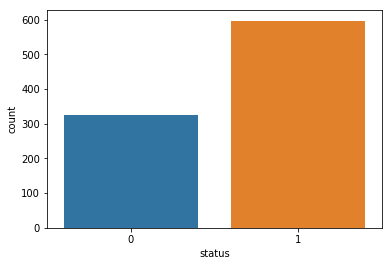

In [13]:
sns.countplot(train['status'])

Removing Null Values

In [14]:
train.isnull().sum()

age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
status  

In [15]:
train['age_first_milestone_year'] = train['age_first_milestone_year'].fillna(train['age_first_milestone_year'].median())
test['age_first_milestone_year'] = test['age_first_milestone_year'].fillna(train['age_first_milestone_year'].median())
train['age_last_milestone_year'] = train['age_last_milestone_year'].fillna(train['age_last_milestone_year'].median())
test['age_last_milestone_year'] = test['age_last_milestone_year'].fillna(train['age_last_milestone_year'].median())

In [16]:
#train.isnull().sum()

In [17]:
train .head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,...,1,0,1,0,0,0,0,1.0000,0,1
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,...,0,1,0,0,1,1,1,4.7500,1,1
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,...,0,0,0,1,0,0,0,4.0000,1,1
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,...,0,0,0,0,1,1,1,3.3333,1,1
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,...,0,1,1,0,0,0,0,1.0000,1,0


splitting the data

In [18]:
X=train.drop('status',axis=1)
y=train['status']
x_test=test

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  sc.fit_transform(X)
X

array([[ 0.00544819, -0.31310227,  0.62399033, ..., -0.3327311 ,
        -0.98131975, -2.06017431],
       [ 1.15196028,  2.04491818,  1.48117495, ...,  3.00542987,
         1.02019053,  0.48539582],
       [-0.47934943, -0.97716151, -0.55376739, ..., -0.3327311 ,
         0.61988848,  0.48539582],
       ...,
       [ 2.4950378 ,  1.53876602,  2.21475186, ...,  3.00542987,
         2.75483278,  0.48539582],
       [-0.58855244, -0.37034527, -0.81000581, ..., -0.3327311 ,
        -0.98131975,  0.48539582],
       [ 0.35266595, -0.27338952,  0.37978258, ..., -0.3327311 ,
         0.0861524 ,  0.48539582]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)
print("Shape of the test data :", x_test.shape)

Shape of the X Train : (738, 31)
Shape of the y Train : (738,)
Shape of the X test : (185, 31)
Shape of the y test : (185,)
Shape of the test data : (231, 31)


# Model Building

In [21]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc

Random Forests

Training Accuracy : 0.7859078590785907
Testing Accuracy : 0.7783783783783784


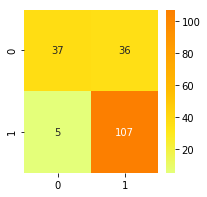

              precision    recall  f1-score   support

           0       0.88      0.51      0.64        73
           1       0.75      0.96      0.84       112

    accuracy                           0.78       185
   macro avg       0.81      0.73      0.74       185
weighted avg       0.80      0.78      0.76       185

roc_auc 0.731103228962818


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=False, max_depth=12, min_samples_leaf=100, min_samples_split=20,
                       n_estimators=100,criterion='entropy',n_jobs=1000,max_leaf_nodes=100,max_features='auto'
                           )

    
rf.fit(X,y)


y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)

SVC

Training Accuracy : 0.9932249322493225
Testing Accuracy : 0.9837837837837838


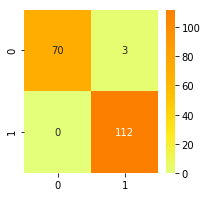

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        73
           1       0.97      1.00      0.99       112

    accuracy                           0.98       185
   macro avg       0.99      0.98      0.98       185
weighted avg       0.98      0.98      0.98       185

roc_auc 0.9794520547945206


In [46]:
from sklearn.svm import SVC
sv = SVC(C=100,degree=2)

sv.fit(X,y)


y_pred_sv = sv.predict(X_test)

print("Training Accuracy :", sv.score(X_train, y_train))
print("Testing Accuracy :", sv.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_sv)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_sv)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_sv)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)